# A data science case study: 311


## Data acquisition

Many governments use <a href="https://www.tylertech.com/products/socrata/data-platform" target="_blank">socrata</a> as their platform to serve data to the public. 

# For this tutorial, we will look at 311 data:

https://data.lacity.org/A-Well-Run-City/MyLA311-Service-Request-Data-2020/rq3b-xjk8

The <a href="https://dev.socrata.com/docs/endpoints.html" target="_blank">Socrata API</a> allows direct and real-time access to open data.

To access the data, we will use the `sodapy` library: https://github.com/xmunoz/sodapy

Instructions on how to use `sodapy` to access data for this dataset:


https://dev.socrata.com/foundry/data.lacity.org/rq3b-xjk8

### Question:
- What is the difference between exporting the data and using the API?

### It's time to start coding: importing libraries

Let's begin our python journey. First, we identify the libraries we will use, and import them into our project:
- `pandas`
- `plotly express`
- `sodapy`

In [1]:
import pandas as pd
import geopandas as gpd
import plotly.express as px
from sodapy import Socrata

### Creating a socrata client
Next, we acquire the data using the socrata API. Use the socrata documentation to grab the code syntax for our data.
- https://dev.socrata.com/foundry/data.lacity.org/rq3b-xjk8

In [2]:
client = Socrata("data.lacity.org", None)

That's great! But what if you wanted something specific, like "all 311 calls in August, 2020?"

In [15]:
# add a "where" statement
results = client.get("rq3b-xjk8", 
                     limit = 1000000, # putting an arbitrary high number (otherwise defaults to 1000)
                    where = "createddate between '2020-07-01T00:00:00' and '2020-07-31T00:00:00'"
                    )

# Convert to pandas DataFrame
calls = pd.DataFrame.from_records(results)
calls.sample(5)

,location,zipcode,suffix,srnumber,updateddate,closeddate,cd,address,createdbyuserorganization,createddate,...,status,tbmrow,direction,anonymous,addressverified,actiontaken,streetname,ncname,apc,tbmpage
60055,"{'latitude': '34.0324518483', 'needs_recoding'...",90016,BLVD,1-1682009658,2020-07-15T07:31:51.000,2020-07-15T07:31:51.000,10,"4606 W ADAMS BLVD, 90016",OCB,2020-07-15T07:26:26.000,...,Closed,7,W,N,Y,SR Created,,WEST ADAMS NC,South Los Angeles APC,633
92174,"{'latitude': '34.1020145838', 'needs_recoding'...",90046,AVE,1-1689425101,2020-07-24T05:55:39.000,2020-07-23T17:02:18.000,4,"1720 N FULLER AVE, 90046",Self Service,2020-07-22T09:26:20.000,...,Closed,4,N,Y,Y,SR Created,FULLER,HOLLYWOOD HILLS WEST NC,Central APC,593
70649,"{'latitude': '34.0233204927', 'needs_recoding'...",90021,ST,1-1684935401,2020-08-19T14:15:12.000,2020-08-19T14:15:11.000,14,"1827 E 16TH ST, 90021",Self Service,2020-07-17T08:44:59.000,...,Closed,1,E,Y,Y,SR Created,16TH,DOWNTOWN LOS ANGELES,South Los Angeles APC,674
122498,"{'latitude': '34.1809260656', 'needs_recoding'...",91356,AVE,1-1695798721,2020-07-30T16:29:50.000,2020-07-30T11:34:27.000,3,"6058 N MELVIN AVE, 91356",Self Service,2020-07-28T20:39:40.000,...,Closed,7,N,N,Y,SR Created,MELVIN,TARZANA NC,South Valley APC,530
31264,"{'latitude': '34.1830332085', 'needs_recoding'...",91606,,1-1675735631,2020-07-08T16:20:54.000,2020-07-08T16:20:53.000,2,"TROOST AVE AT ERWIN ST, 91606",ITA,2020-07-08T13:13:42.000,...,Cancelled,7,,Y,Y,SR Created,,NOHO NC,South Valley APC,532


## Data Exploration and Analysis

In [16]:
# how many rows and columns?
print(calls.shape)

(134119, 34)


In [17]:
# what fields?
print(calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134119 entries, 0 to 134118
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   location                   134045 non-null  object
 1   zipcode                    134119 non-null  object
 2   suffix                     134119 non-null  object
 3   srnumber                   134119 non-null  object
 4   updateddate                134119 non-null  object
 5   closeddate                 131543 non-null  object
 6   cd                         134043 non-null  object
 7   address                    134119 non-null  object
 8   createdbyuserorganization  134119 non-null  object
 9   createddate                134119 non-null  object
 10  requestsource              134119 non-null  object
 11  requesttype                134119 non-null  object
 12  assignto                   134119 non-null  object
 13  latitude                   134045 non-null  

In [19]:
calls.policeprecinct.unique()

array(['HOLLENBECK', 'RAMPART', 'DEVONSHIRE', 'SOUTHEAST', 'TOPANGA',
       'HARBOR', 'MISSION', 'NORTH HOLLYWOOD', 'HOLLYWOOD',
       'WEST LOS ANGELES', 'VAN NUYS', 'NORTHEAST', 'SOUTHWEST',
       'WEST VALLEY', 'WILSHIRE', 'FOOTHILL', '77TH STREET', 'NEWTON',
       'OLYMPIC', 'CENTRAL', 'PACIFIC', ''], dtype=object)

Now, use plotly express to create a bar chart.
- https://plotly.com/python/bar-charts/

In [21]:
wla = calls.query("policeprecinct == 'WEST LOS ANGELES'")
wla.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5369 entries, 17 to 134004
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   location                   5369 non-null   object
 1   zipcode                    5369 non-null   object
 2   suffix                     5369 non-null   object
 3   srnumber                   5369 non-null   object
 4   updateddate                5369 non-null   object
 5   closeddate                 5270 non-null   object
 6   cd                         5369 non-null   object
 7   address                    5369 non-null   object
 8   createdbyuserorganization  5369 non-null   object
 9   createddate                5369 non-null   object
 10  requestsource              5369 non-null   object
 11  requesttype                5369 non-null   object
 12  assignto                   5369 non-null   object
 13  latitude                   5369 non-null   object
 14  owner

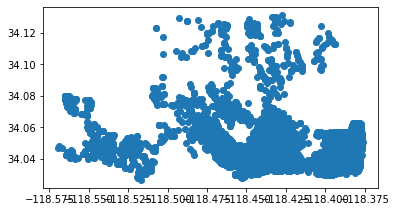

In [29]:
# make it spatial with geopandas
gdf = gpd.GeoDataFrame(
    wla, geometry=gpd.points_from_xy(wla.longitude, wla.latitude))
gdf.plot()

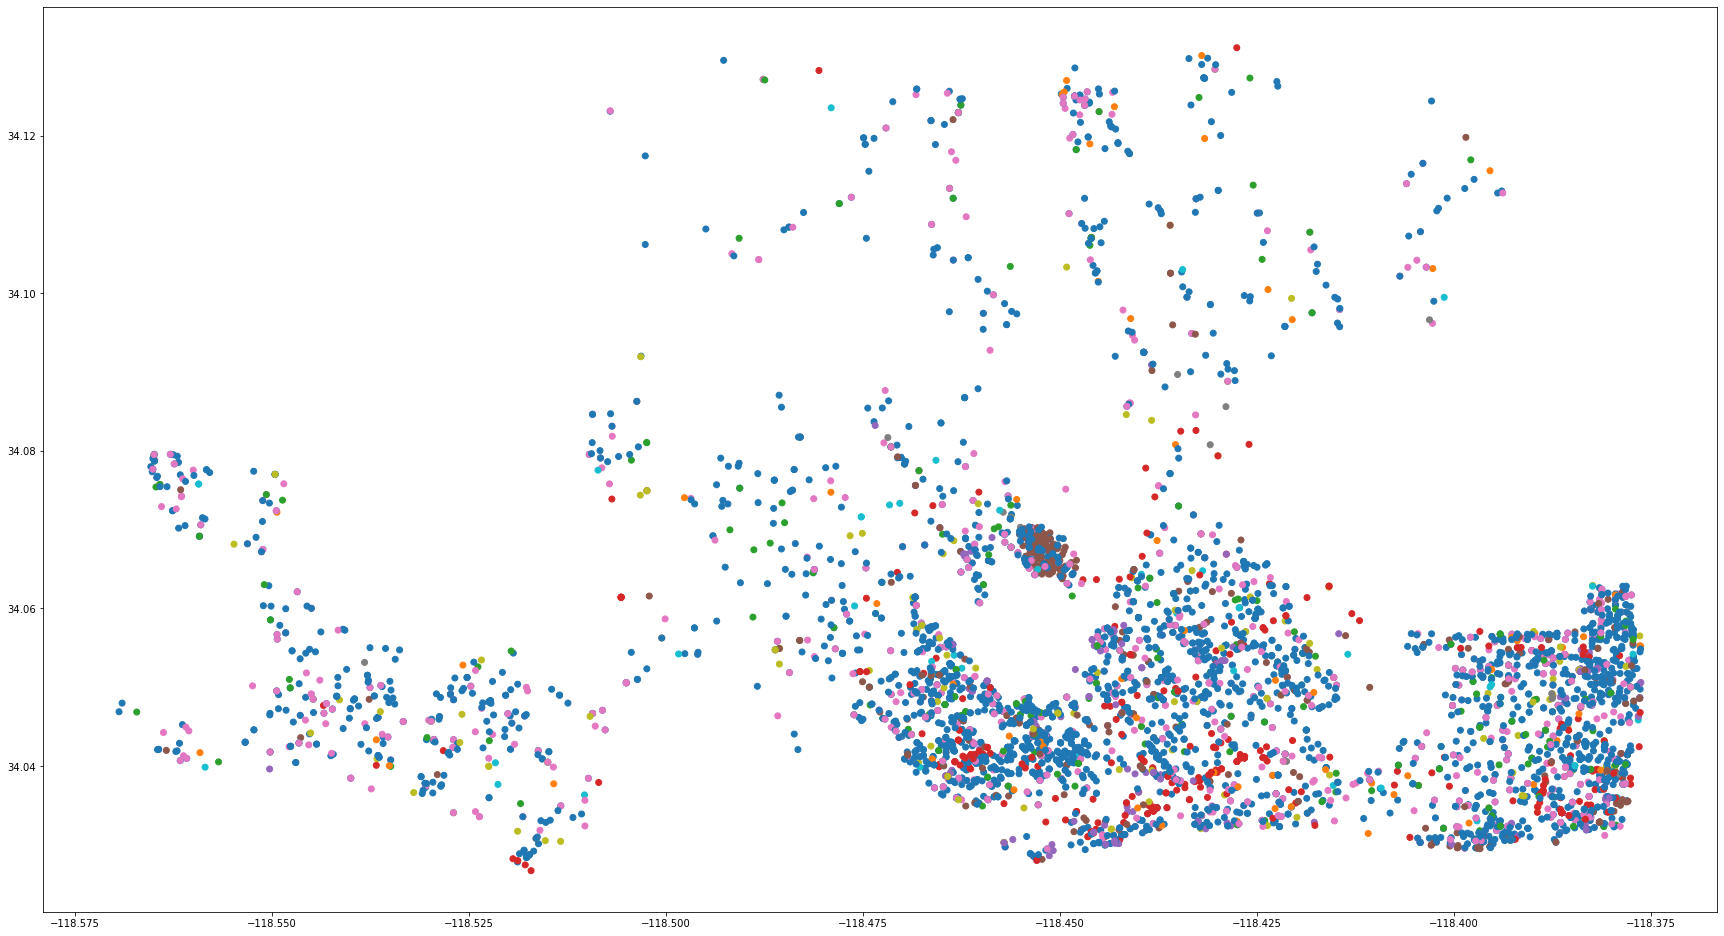

In [31]:
gdf.plot(column='requesttype',figsize=(30,20))

In [32]:
gdf.zipcode.unique()

array(['90025', '90034', '90064', '90049', '90035', '90024', '90210',
       '90077', '90272', '90402', '90067', '90404'], dtype=object)

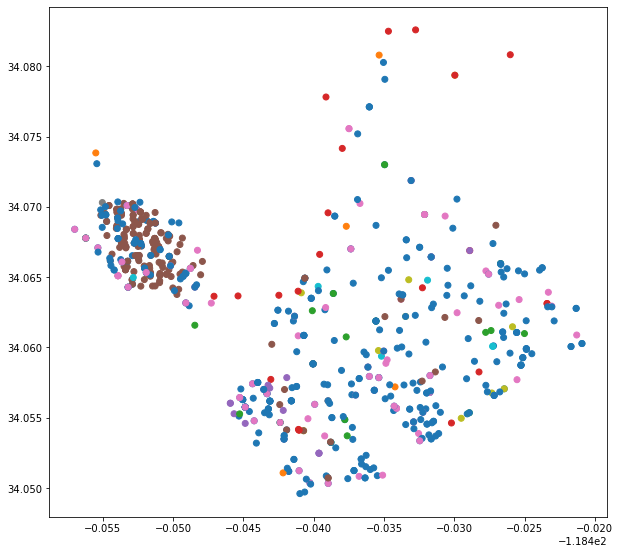

In [47]:
gdf[gdf.zipcode=='90024'].plot(column='requesttype',figsize=(10,10))

## osmnx

Example notebook:
- https://github.com/gboeing/osmnx-examples/blob/master/notebooks/00-osmnx-features-demo.ipynb

In [60]:
# adding streets
import osmnx as ox

# you can make query an unambiguous dict to help the geocoder find it
place = {'city'   : 'Culver City',
         'state'  : 'California',
         'country': 'USA'}
G = ox.graph_from_place(place, network_type='all', truncate_by_edge=True)

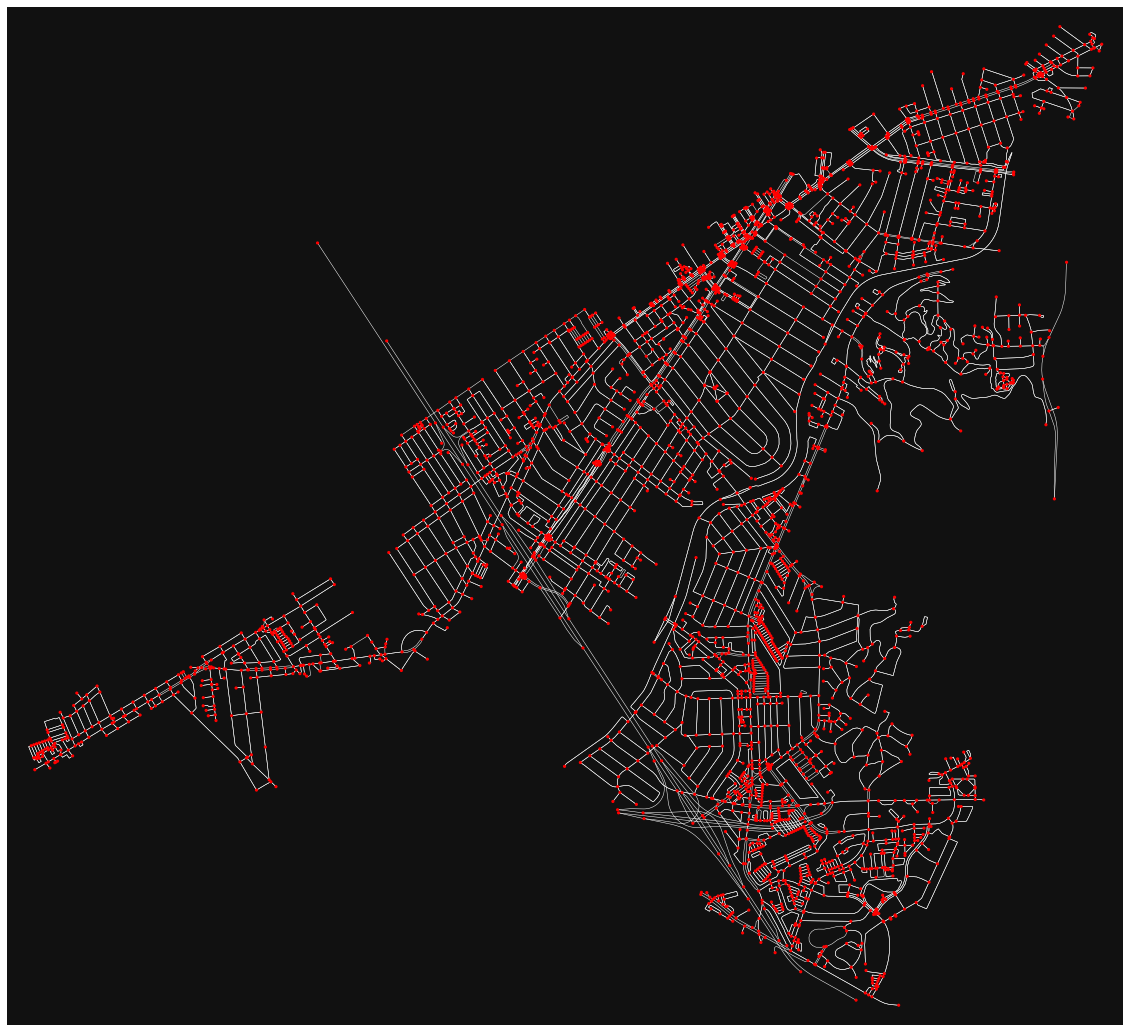

In [68]:
fig, ax = ox.plot_graph(G, figsize=(20,20), node_size=10, edge_color='w', node_color='r', edge_linewidth=0.5)

What happens if we create a scatter plot, placing `lon` in the x-axis `lat` in the y-axis?

In [ ]:
px.scatter(df_mini,
           x='lon',
           y='lat'
          )

## Data visualization: Mapping with plotly
Plotly has support for a mapbox slippy map. Have fun with this, and change the `mapbox_style` attribute to any of the following:

* `open-street-map`
* `white-bg`
* `carto-positron`
* `carto-darkmatter`
* `stamen-terrain`
* `stamen-toner`
* `stamen-watercolor`


In [ ]:
fig = px.scatter_mapbox(df_mini,
                        lat='lat',
                        lon='lon',
                        mapbox_style="stamen-terrain")
fig.show()

In [ ]:
# before you run this cell, what do you think it will produce?
fig = px.scatter_mapbox(df_mini, 
                        lat="lat", 
                        lon="lon", 
                        color="descent_cd"
                       )
fig.update_layout(mapbox_style="carto-darkmatter")

fig.show()

## Advanced visualizations: 3D mapping
- https://kepler.gl/

<img src="images/kepler.png" width=800>

### A note on kepler and other geo-library installations

Installing kepler and geopandas can be challenging. If you are using a JupyterHub that is already set up with these libraries in them, ignore the following instructions that are for Anaconda users.

First, geopandas. I have had much trouble installing geopandas successfully on existing environments. I would thus recommend to create a brand new environment in Anaconda, and first install geopandas.

`conda install geopandas`

Then, install jupyter.

Kepler is not part of the conda forge channel, so we are forced to use pip:

`pip install keplergl`

If after installing kepler, the map does not show, try the following three commands in your environment's terminal:

`pip install --upgrade jupyterthemes
jupyter nbextension install --py --sys-prefix keplergl
jupyter nbextension enable --py --sys-prefix keplergl`

Source: https://github.com/keplergl/kepler.gl/issues/583

You may need to restart your jupyter notebook and Anaconda if that is what you are using.

Import the keplergl library.

In [ ]:
from keplergl import KeplerGl

Create a default kepler map.

In [ ]:
map = KeplerGl(height=600,width=800)
map

Add our `df_mini` as a data layer on the map. Within the kepler widget, manipulate the map 
- change points to grid cells or hexbins
- change the color palette so that hot spots are red
- change the color scale from `quantile` to `quansize`
- add height to your data
- switch to 3D map view
- adjust the height of the data cells
- add `arst_date` as a filter

In [ ]:
map.add_data(data=df_mini,name='arrests')

### Saving your kepler map as an html page

In [ ]:
map.save_to_html(file_name='la_arrests.html',read_only=True)